# Practico 3 y 4 (parte 8 b)

## Desempeño de Clasificador Árbol de Decisiones utilizando Vectorización de Dialogos

## Importación de módulos y librerías

In [1]:
# Inclusion de librerias y módulos
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# Nos permite convertir str a list
from ast import literal_eval

# Separación
from sklearn.model_selection import train_test_split

# Arbol de decisiones
from sklearn.tree import DecisionTreeClassifier

# Vectorizador
from sklearn.feature_extraction.text import TfidfVectorizer

# Classification report
from sklearn.metrics import classification_report

# Colores
BLUE   = '#5DADE2'
RED    = '#ff7043'
ORANGE = '#F5B041'
GREEN  = '#58D68D'
YELLOW = '#F4D03F'
pltcolors = [BLUE, RED, ORANGE, GREEN, YELLOW]

# Plot axes y legends parambs
plt.rcParams["axes.labelweight"]   = "bold"
plt.rcParams["axes.titleweight"]   = "bold"
plt.rcParams["legend.shadow"]      = True
plt.rcParams["figure.titleweight"] = "bold"

data_dir = os.path.join('..', 'dataset', 'ablations')

### Definicicion de la tasa de ablación y casos de análisis

Consideramos la tasa de abalación en el intérvalo que va del 20% de los turnos hasta el 100% de los turnos con incrementos de 20%. El objtivo es analizar el impacto o relevancia del contenido de los turnos variando la cantidad de los mismos. A su vez, para cada caso de abalación, consideramos tres escenarios diferentes. El primer escenario consiste en utilizar en el análisis los turnos de estudiantes y tutores. El segundo escenario consiste en solo considerar los turnos corresponidientes a los estudiantes, mientras que, en el tercer y último escenario se considerarn solo los turnos de los tutores. Tal como mencionamos con aterioridad, el objetivo perseguido en este proceso es observar el impacto de cada uno de los paticipantes en el proceso de calificacion de la sesión.

In [2]:
tokeep_list = [0.2, 0.4 , 0.6, 0.8, 1.0]
participantes = ['students_tutors', 'students', 'tutors']

### Procedimiento

1. Cargamos los conjuntos de datos, a los cuales ya se les ha relizado el proceso de ablación. Optamos por proceder de este modo para dejar fuera del bucle el costo de procesamiento de la ablación. Es necsario destacar que el conjuto de datos `yup_messages_ablated_{}_{}.csv` se genera a partir de los conjuntos de datos `yup_messages_preprocessed.csv` y `datadump-20150801-20171219.csv`.
2. Separamos el conjunto de datos en los sub conjuntos de características `X` y objetivo `y`. El conjunto de caracteríisticas es previamente convertido de tipo str a list con elementos del tipo str.
3. Dividimos el conjuto de datos en los sub conjuntos train y test en una proporción del 80% y 20% del total respectivamente.
4. Utilizamos [TfidfVectorizer](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) para vectorizar el conjunto de datos o corpus dado que algunas palabras estarán muy presentes, por lo que llevarán muy poca información significativa sobre el contenido real del documento. Si fuéramos a alimentar los datos de conteo directo a un clasificador, esos términos muy frecuentes ensombrecerían las frecuencias de términos más raros pero más interesantes.
5. Por simplisidad consideramos el `DecisionTreeClassifier` con los parametros por defecto.
6. Se generan los reportes de desempeño del clasificador para ambos conjuntos (train y test)
7. Se genera el log de variable spara cada caso de análisis.

In [3]:
results = dict()
for part in participantes:

    results[part] = dict()
    for tk in tokeep_list:
        print(f'>> Tipo de participante {part} y ablation al {tk:05.2f}...')

        #1. Carga de los datasets
        fname = f'yup_messages_ablated_{tk:05.2f}_{part}.csv'
        fpath = os.path.join(data_dir, fname)
        df = pd.read_csv(fpath)

        #2. Separacion en features y target
        X = df.text.apply(lambda x: ' '.join(literal_eval(x)))
        y = df.student_rating
        
        #3. Division en conjunto de train y test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        #4. Vectorizacion: Entrenamiento y transformación de los conjuntos de train y test
        vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)

        #5. Clasificador Decision Tree: Entrenamiento y clasificación
        DT = DecisionTreeClassifier(random_state=42)
        DT.fit(X_train, y_train)
        y_train_DT = DT.predict(X_train)
        y_test_DT = DT.predict(X_test)

        #6. Reportes de clasificación
        cr_train = classification_report(y_train, y_train_DT, output_dict=True)
        cr_test = classification_report(y_test, y_test_DT, output_dict=True)

        #7. Log de resultados
        results[part][f'{tk:05.2f}'] = dict()
        results[part][f'{tk:05.2f}']['size_train'] = X_train.shape
        results[part][f'{tk:05.2f}']['size_test'] = X_test.shape
        results[part][f'{tk:05.2f}']['cr_train'] = cr_train
        results[part][f'{tk:05.2f}']['cr_test'] = cr_test

>> Tipo de participante students_tutors y ablation al 00.20...
>> Tipo de participante students_tutors y ablation al 00.40...
>> Tipo de participante students_tutors y ablation al 00.60...
>> Tipo de participante students_tutors y ablation al 00.80...
>> Tipo de participante students_tutors y ablation al 01.00...
>> Tipo de participante students y ablation al 00.20...
>> Tipo de participante students y ablation al 00.40...
>> Tipo de participante students y ablation al 00.60...
>> Tipo de participante students y ablation al 00.80...
>> Tipo de participante students y ablation al 01.00...
>> Tipo de participante tutors y ablation al 00.20...
>> Tipo de participante tutors y ablation al 00.40...
>> Tipo de participante tutors y ablation al 00.60...
>> Tipo de participante tutors y ablation al 00.80...
>> Tipo de participante tutors y ablation al 01.00...


### Procesamiento del log de resultados

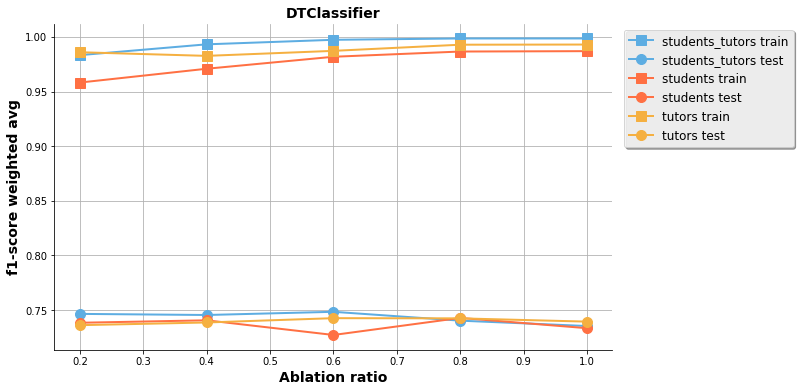

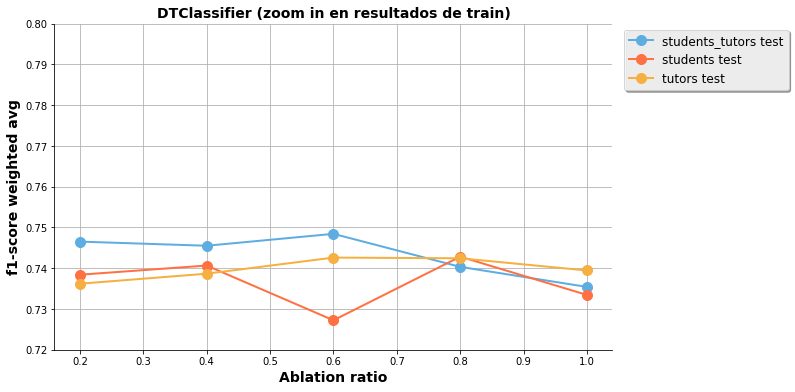

In [9]:
sizeh_train = list()
sizeh_test = list()
sizew_train = list()
sizew_test = list()
ps = list()
tks = list()

# plt.figure(figsize=(10,6))
for i,part in enumerate(participantes):
    f1_train = list()
    f1_test = list()
    for tk in tokeep_list:
        f1_train.append(results[part][f'{tk:05.2f}']['cr_train']['weighted avg']['f1-score'])
        f1_test.append(results[part][f'{tk:05.2f}']['cr_test']['weighted avg']['f1-score'])
        sizeh_train.append(results[part][f'{tk:05.2f}']['size_train'][0])
        sizeh_test.append(results[part][f'{tk:05.2f}']['size_test'][0])
        sizew_train.append(results[part][f'{tk:05.2f}']['size_train'][1])
        sizew_test.append(results[part][f'{tk:05.2f}']['size_test'][1])
        ps.append(part)
        tks.append(tk)

    plt.figure(1, figsize=(10,6))
    plt.plot(tokeep_list, f1_train, 's-', color=pltcolors[i], linewidth=2.0, markersize=10, label=f'{part} train')
    plt.plot(tokeep_list, f1_test, 'o-', color=pltcolors[i], linewidth=2.0, markersize=10, label=f'{part} test')
    
    plt.figure(2, figsize=(10,6))
    plt.plot(tokeep_list, f1_test, 'o-', color=pltcolors[i], linewidth=2.0, markersize=10, label=f'{part} test')

plt.figure(1, figsize=(10,6))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.01,1), loc="upper left",fontsize=12)
plt.xlabel('Ablation ratio', fontsize=14)
plt.ylabel('f1-score weighted avg', fontsize=14)
plt.title('DTClassifier', fontsize=14)
sns.despine()

plt.figure(2, figsize=(10,6))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.01,1), loc="upper left",fontsize=12)
plt.xlabel('Ablation ratio', fontsize=14)
plt.ylabel('f1-score weighted avg', fontsize=14)
plt.title('DTClassifier (zoom in en resultados de train)', fontsize=14)
plt.ylim([0.72, 0.80])
sns.despine()


sizes_matrix = dict()
sizes_matrix['participant'] = ps
sizes_matrix['ablation'] = tks
sizes_matrix['rows_train'] = sizeh_train
sizes_matrix['cols_train'] = sizew_train
sizes_matrix['rows_test'] = sizeh_test
sizes_matrix['cols_test'] = sizew_test

sizes_matrix = pd.DataFrame(sizes_matrix)
sizes_matrix['rows_total'] = sizes_matrix.rows_train + sizes_matrix.rows_test

## Análisis

A los fines del análisis selecionamos la métrica `f1-score weighted avg` dado que la misma representa un mayor comporomiso y balance entre precision y recall y por que la misma se encuentra disponible en los prácticos anteriores a modo de referencia. Para el caso del presente clasificador en el [Practico_3y4_part3.ipynb](file://Practico_3y4_part3.ipynb) se obtuvieron los valores

<center> * Train: 0.999
<center> * Test : 0.739

Tomando como referencia los resultados obtenidos con los conjuntos de test, podemos obsevar que el desempeño del clasificador utilizando cualquiera de los conjuntos de turnos se muestra relativamente constante respecto al grado de ablación al rededor del valor 0.74. En términos de desempeño relativo, el classificador asociado al conjunto de datos de tutores más estudiantes presenta mejor desempeño en el rango que se extiende de 0.2 a 0.6 de la tasa de ablació. También es posible destacar que el desempeño del clasificador asociado al conjunto de datos con solo tutores es mas constante en el rango entero.

Contrario al caso del ejercicio [Practico_3y4_part3a.ipynb](file://Practico_3y4_part3a.ipynb) se observa mayor independencia al grado de ablació. Sin embargo, el desempeño es levemente inferior en test.

In [5]:
display(sizes_matrix)

,participant,ablation,rows_train,cols_train,rows_test,cols_test,rows_total
0,students_tutors,0.2,13943,14587,3486,14587,17429
1,students_tutors,0.4,13943,20791,3486,20791,17429
2,students_tutors,0.6,13943,25495,3486,25495,17429
3,students_tutors,0.8,13943,29476,3486,29476,17429
4,students_tutors,1.0,13943,33151,3486,33151,17429
5,students,0.2,13939,9258,3485,9258,17424
6,students,0.4,13939,13706,3485,13706,17424
7,students,0.6,13939,17156,3485,17156,17424
8,students,0.8,13939,19979,3485,19979,17424
9,students,1.0,13939,21704,3485,21704,17424


### Tamaños de los conjuntos y vectorización

En la tabla superior es posible observar el dimensionamiento del conjunto de datos. En primera instancia podemos observar que el número de casos o entradas en los conjuntos de datos, representado bajo las columnas `rows_train` y `rows_test`, se mantiene aproximadamente constante. 

Un aspecto que resulta de interes analizar es el la longitud del vector de características generado con TfidfVectorizer para tutores y estudiates, referenciado a la longitud del vector de características sin ablación para el caso de estudiantes con tutores. Allí podemos observar, por un lado, que los vectores de caracteristicas para el caso de estudiantes o tutores tienen prácticamente el mismo tamaño. Mientras que por otro lado podemos afirma tambien que con el 33% al 65% de las características es posible obtener un desempeño muy similar al mejor caso (tutores más estudiantes con todos los diálogos.)

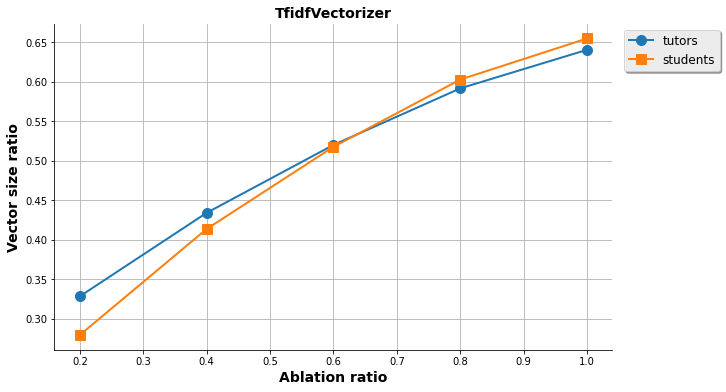

In [6]:
referencia = sizes_matrix[(sizes_matrix.participant=='students_tutors') & (sizes_matrix.ablation>=0.9)].cols_test.values[0]
referencia
tutors_vec = sizes_matrix[sizes_matrix.participant=='tutors'].cols_test.apply(lambda x: x/referencia).to_numpy()
students_vec = sizes_matrix[sizes_matrix.participant=='students'].cols_test.apply(lambda x: x/referencia).to_numpy()

plt.figure(figsize=(10,6))
plt.plot(tokeep_list, tutors_vec, '-o', linewidth=2.0, markersize=10, label='tutors')
plt.plot(tokeep_list, students_vec, '-s', linewidth=2.0, markersize=10, label='students')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.01,1), loc="upper left",fontsize=12)
plt.xlabel('Ablation ratio', fontsize=14)
plt.ylabel('Vector size ratio', fontsize=14)
plt.title('TfidfVectorizer', fontsize=14)
sns.despine()